In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [8]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)




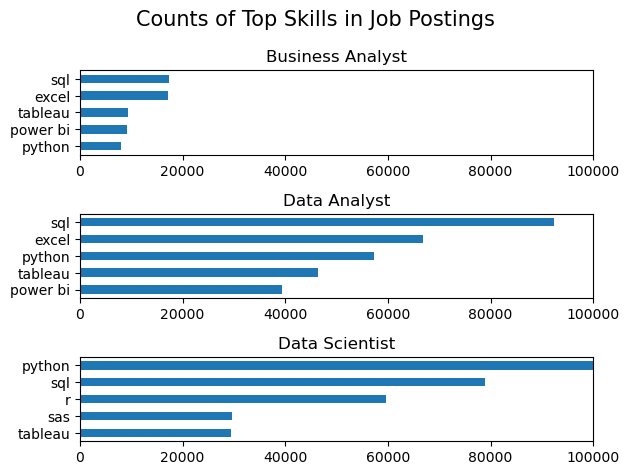

In [16]:
jobs = ['Business Analyst', 'Data Analyst', 'Data Scientist']
fig, ax = plt.subplots(3,1)

for i,job_title in enumerate(jobs):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind = 'barh', y='skill_count', x = 'job_skills', ax = ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 100000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()